# **LABORATORIO 2 – Grupo G7**

### **Integrantes:**

- **Marco Fernando Rodríguez Barco** – *92035406*  
- **Jorge Mario Paniagua González** – *1322112*  
- **Jorge Andrés García Dahinten** – *2288424*  
- **Víctor Francisco Mota Alvarado** – *1089017*  
- **Audrie Annelisse Del Cid Ochoa** – *2211425*

---

## 1. Preparación del entorno y carga / preprocesamiento del conjunto de datos


Importar librerías

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier

In [36]:
########################################### 2. Cargar el dataset
# a. Carga el conjunto de datos proporcionado (en formato CSV u otro compatible).
df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [37]:
# c. Realiza un análisis exploratorio básico para identificar valores nulos, datos atípicos y la distribución de las variables.
#       Verificar columnas y tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [38]:
#       Verificar valires nulos
print("Valores con '?':")
for col in df.columns:
    print(f"{col}: {(df[col] == '?').sum()}")

Valores con '?':
age: 0
workclass: 1836
fnlwgt: 0
education: 0
education.num: 0
marital.status: 0
occupation: 1843
relationship: 0
race: 0
sex: 0
capital.gain: 0
capital.loss: 0
hours.per.week: 0
native.country: 583
income: 0


In [39]:
#       Reemplazar "?" por NaN y luego eliminar filas con valores faltantes
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)

In [40]:
#       Verificación posterior a la limpieza
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education.num   30162 non-null  int64 
 5   marital.status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital.gain    30162 non-null  int64 
 11  capital.loss    30162 non-null  int64 
 12  hours.per.week  30162 non-null  int64 
 13  native.country  30162 non-null  object
 14  income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [41]:
# d. Convierte las variables categóricas en numéricas mediante técnicas de codificación, como la codificación de etiquetas o variables ficticias.
# Identificamos las columnas categóricas
cat_cols = df.select_dtypes(include='object').columns

In [42]:
label_encoders = {}

In [43]:
#       Aplicamos LabelEncoder a cada columna categórica
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [44]:
X = df.drop('income', axis=1)
y = df['income']

In [45]:
# f. Divide el conjunto de datos en conjuntos de entrenamiento y prueba, utilizando una proporción adecuada (por ejemplo, 80% entrenamiento y 20% prueba).
#       Dividimos 80% para entrenamiento y 20% para prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
# e. Estandariza o normaliza las variables numéricas para mejorar el rendimiento del modelo.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 3.	Construcción del Modelo de Perceptrón Simple 

In [47]:
# a. Utiliza un clasificador de perceptrón simple para entrenar el modelo con el conjunto de datos de entrenamiento.
# b. Ajusta los parámetros de entrenamiento, como la tasa de aprendizaje y el número máximo de iteraciones.
perceptron = Perceptron(max_iter=1000, eta0=1.0, random_state=42)

In [48]:
#       Entrenar con los datos
perceptron.fit(X_train, y_train)

Perceptron(random_state=42)

In [49]:
# c. Evalúa el modelo utilizando el conjunto de prueba para obtener métricas de rendimiento como la matriz de confusión, precisión, recall y F1-score.
#       Predecir en el conjunto de prueba
y_pred = perceptron.predict(X_test)

In [50]:
#       Evaluar el modelo
print("=== Perceptrón Simple ===")
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

=== Perceptrón Simple ===
Matriz de Confusión:
[[4013  520]
 [1082  418]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.79      0.89      0.83      4533
           1       0.45      0.28      0.34      1500

    accuracy                           0.73      6033
   macro avg       0.62      0.58      0.59      6033
weighted avg       0.70      0.73      0.71      6033



## 4.	Construcción del Perceptrón Multicapa (MLP) 

a. Implementa un perceptrón multicapa utilizando un clasificador adecuado.
b. Define la arquitectura de la red neuronal, incluyendo el número de capas ocultas, el número de neuronas por capa y la función de activación.
c. Ajusta los hiperparámetros relevantes, como el algoritmo de optimización, la tasa de aprendizaje y el número de iteraciones.

In [51]:
mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam',
                    max_iter=300, random_state=42)

In [52]:
#       Entrenar el modelo
mlp.fit(X_train, y_train)

c:\Users\annau\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=42)

In [53]:
# d. Evalúa el modelo con el conjunto de prueba y analiza las métricas de rendimiento obtenidas.
#       Predecir
y_pred_mlp = mlp.predict(X_test)

In [54]:
# Evaluar
print("\n=== Perceptrón Multicapa (MLP) ===")
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred_mlp))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_mlp))


=== Perceptrón Multicapa (MLP) ===
Matriz de Confusión:
[[4139  394]
 [ 565  935]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.88      0.91      0.90      4533
           1       0.70      0.62      0.66      1500

    accuracy                           0.84      6033
   macro avg       0.79      0.77      0.78      6033
weighted avg       0.84      0.84      0.84      6033



C:\Users\annau\AppData\Local\Temp\ipykernel_16896\1739073673.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='income', palette="Set2")


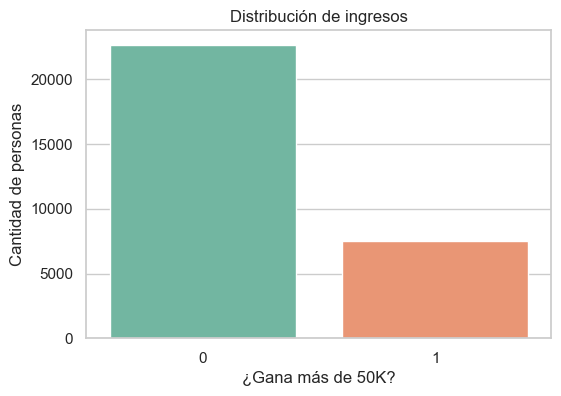

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='income', palette="Set2")
plt.title("Distribución de ingresos")
plt.xlabel("¿Gana más de 50K?")
plt.ylabel("Cantidad de personas")
plt.show()




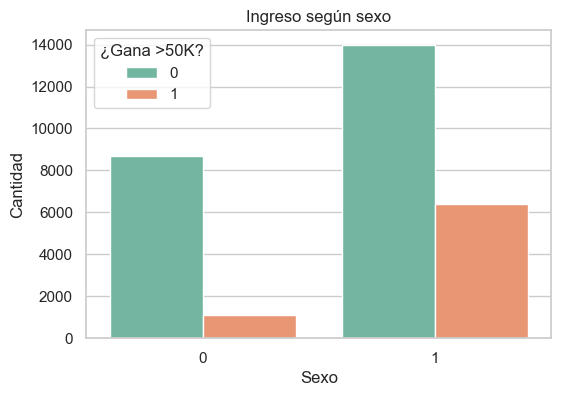

In [56]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='sex', hue='income', palette="Set2")
plt.title("Ingreso según sexo")
plt.xlabel("Sexo")
plt.ylabel("Cantidad")
plt.legend(title="¿Gana >50K?")
plt.show()


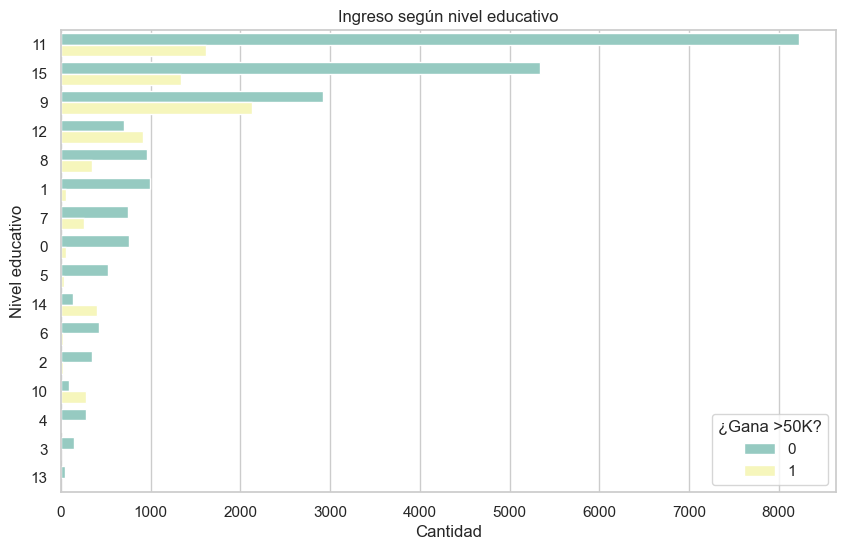

In [57]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='education', hue='income', palette="Set3", order=df['education'].value_counts().index)
plt.title("Ingreso según nivel educativo")
plt.xlabel("Cantidad")
plt.ylabel("Nivel educativo")
plt.legend(title="¿Gana >50K?")
plt.show()


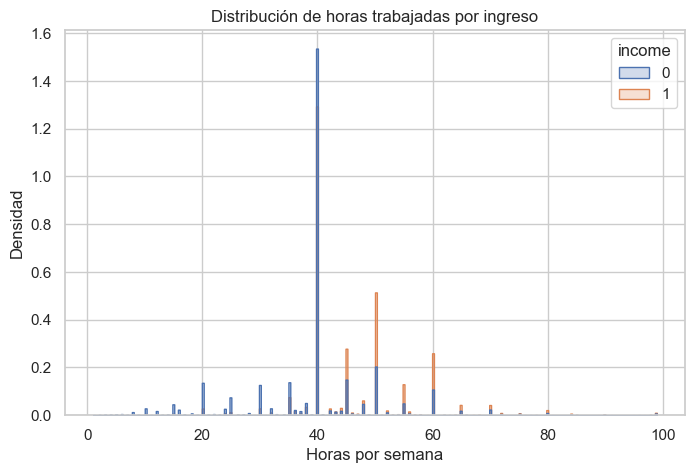

In [58]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='hours.per.week', hue='income', element="step", stat="density", common_norm=False)
plt.title("Distribución de horas trabajadas por ingreso")
plt.xlabel("Horas por semana")
plt.ylabel("Densidad")
plt.show()


## Nivelando la data

### Ajuste del desbalance en la variable objetivo

Durante la evaluación del perceptrón simple, se evidenció un rendimiento deficiente al clasificar a personas que ganan más de 50K al año. Este comportamiento está asociado a un **desequilibrio en la variable income**, donde predominan los registros correspondientes a ingresos menores o iguales a 50K.

Aunque no se puede asgurar si el modelo presenta sobreajuste, la desproporción de clases (aproximadamente 3:1) limitaba la capacidad del modelo para aprender correctamente los patrones de la clase minoritaria.

Para amortiguar este problema, se aplicó una estrategia mixta mencionada en clase:
- Se **redujo** la cantidad de registros de la clase mayoritaria (`<=50K`) a **15,000** mediante *undersampling*.
- Se **aumentó** la cantidad de ejemplos de la clase minoritaria (`>50K`) a **8,000** utilizando la técnica **SMOTE**, que genera datos sintéticos basados en vecinos cercanos.

El objetivo de este procedimiento es proporcionar un conjunto de entrenamiento más equilibrado, que permita al modelo mejorar su capacidad predictiva sobre ambas clases.


In [59]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import pandas as pd

# 1. Reducir la clase 0 (<=50K) a 15,000
under = RandomUnderSampler(sampling_strategy={0: 15000}, random_state=42)

# 2. Aumentar la clase 1 (>50K) a 8,000 con SMOTE
smote = SMOTE(sampling_strategy={1: 8000}, random_state=42)

# 3. Crear pipeline de balanceo
pipeline = Pipeline(steps=[('undersample', under), ('oversample', smote)])

# 4. Aplicar al conjunto de entrenamiento
X_train_bal, y_train_bal = pipeline.fit_resample(X_train, y_train)

# 5. Confirmar resultado
print("Distribución después del balanceo:")
print(pd.Series(y_train_bal).value_counts())


Distribución después del balanceo:
income
0    15000
1     8000
Name: count, dtype: int64


C:\Users\annau\AppData\Local\Temp\ipykernel_16896\514803273.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_bal, x='income', palette="Set2")


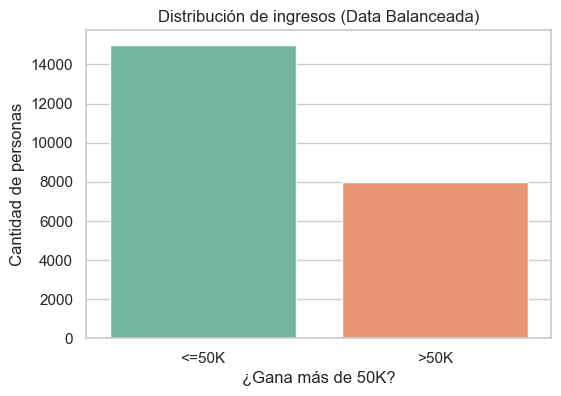

In [60]:
# Asegúrate de tener y_train_bal en un DataFrame
df_bal = pd.DataFrame({'income': y_train_bal})

sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.countplot(data=df_bal, x='income', palette="Set2")
plt.title("Distribución de ingresos (Data Balanceada)")
plt.xlabel("¿Gana más de 50K?")
plt.ylabel("Cantidad de personas")
plt.xticks(ticks=[0, 1], labels=["<=50K", ">50K"])
plt.show()



### Ejecutando modelos nuevamente

In [61]:
X_train_bal, y_train_bal



(array([[-1.09963217, -0.20711473,  0.80646539, ..., -0.22098753,
         -0.41140279,  0.26538572],
        [ 0.96025495, -0.20711473, -1.09722277, ..., -0.22098753,
         -0.07756541,  0.26538572],
        [-0.18412678, -0.20711473, -0.95794747, ..., -0.22098753,
          2.00891822,  0.26538572],
        ...,
        [ 0.49050049,  0.84035359, -0.68128276, ..., -0.22098753,
          0.78328658,  0.26538572],
        [-0.16831338,  0.20806274, -0.75856682, ...,  4.52450509,
          0.33973132,  0.26538572],
        [ 0.42028129, -0.20711473,  0.2691083 , ..., -0.22098753,
         -0.07756541, -4.41286782]]),
 0        0
 1        0
 2        0
 3        0
 4        0
         ..
 22995    1
 22996    1
 22997    1
 22998    1
 22999    1
 Name: income, Length: 23000, dtype: int32)

## Entrenar el Perceptrón (con datos balanceados)

In [62]:
# Entrenar el perceptrón con datos balanceados
perceptron_bal = Perceptron(max_iter=1000, eta0=1.0, random_state=42)
perceptron_bal.fit(X_train_bal, y_train_bal)

y_pred_bal = perceptron_bal.predict(X_test)

print("=== Perceptrón Simple (Balanceado) ===")
print(confusion_matrix(y_test, y_pred_bal))
print(classification_report(y_test, y_pred_bal))


=== Perceptrón Simple (Balanceado) ===
[[3601  932]
 [ 799  701]]
              precision    recall  f1-score   support

           0       0.82      0.79      0.81      4533
           1       0.43      0.47      0.45      1500

    accuracy                           0.71      6033
   macro avg       0.62      0.63      0.63      6033
weighted avg       0.72      0.71      0.72      6033



## Entrenar el MLP (con datos balanceados)

In [64]:
mlp_bal = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam',
                        max_iter=300, random_state=42)
mlp_bal.fit(X_train_bal, y_train_bal)

y_pred_mlp_bal = mlp_bal.predict(X_test)

print("=== MLP (Balanceado) ===")
print(confusion_matrix(y_test, y_pred_mlp_bal))
print(classification_report(y_test, y_pred_mlp_bal))

=== MLP (Balanceado) ===
[[4033  500]
 [ 492 1008]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      4533
           1       0.67      0.67      0.67      1500

    accuracy                           0.84      6033
   macro avg       0.78      0.78      0.78      6033
weighted avg       0.84      0.84      0.84      6033



In [65]:
mlp_sigmoid = MLPClassifier(hidden_layer_sizes=(100,), activation='logistic', solver='adam',
                            max_iter=300, random_state=42)

mlp_sigmoid.fit(X_train_bal, y_train_bal)

y_pred_mlp_sigmoid = mlp_sigmoid.predict(X_test)

print("=== MLP (Sigmoid, Balanceado) ===")
print(confusion_matrix(y_test, y_pred_mlp_sigmoid))
print(classification_report(y_test, y_pred_mlp_sigmoid))


=== MLP (Sigmoid, Balanceado) ===
[[3963  570]
 [ 429 1071]]
              precision    recall  f1-score   support

           0       0.90      0.87      0.89      4533
           1       0.65      0.71      0.68      1500

    accuracy                           0.83      6033
   macro avg       0.78      0.79      0.79      6033
weighted avg       0.84      0.83      0.84      6033



c:\Users\annau\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


## 5.	Comparación de Resultados 

#### a.	Compara el rendimiento del perceptrón simple y el MLP en función de las métricas de evaluación. 
<center>
<table>
  <tr>
    <td style="text-align:center"><strong>Perceptrón Simple</strong></td>
    <td style="text-align:center"><strong>Perceptrón Multicapa (MLP)</strong></td>
  </tr>
  <tr>
    <td><img src="./img/PERCEPTRON.jpg" width="350"></td>
    <td><img src="./img/MLP.jpg" width="350"></td>
  </tr>
</table>
</center>

El Perceptrón Multicapa (MLP) mostró mejor rendimiento en todas las métricas, especialmente en la capacidad de predecir correctamente a quienes ganan más de 50K, que es la más difícil por tener menor cantidad de data para entrenar el modelo. Esto se evidencia en la mayor precisión y recall, logrando un balance más justo entre ambas clases.

#### b. Diferencias en la capacidad de generalización
El Perceptrón Simple tiene una estructura lineal y no logra capturar relaciones complejas en los datos, lo que limita su capacidad para generalizar, más aún cuando la variable objetivo tiene desbalance de clases.

El MLP, al incorporar una o más capas ocultas no lineales, puede modelar patrones más complejos y generalizar mejor, incluso ante el desbalance. Esto se refleja en su desempeño superior al evaluar con datos de prueba reales.



#### c. Complejidad del modelo y resolución de problemas lineales vs no lineales
El Perceptrón Simple solo puede resolver problemas linealmente separables, por lo tanto no es capaz de trazar múltiples fronteras para clases que requieren más de una línea de decisión.

El MLP introduce no linealidades a través de funciones de activación como ReLU, lo que le permite construir múltiples fronteras de decisión y adaptarse a relaciones más complejas entre las variables. Este aumento en complejidad le da la flexibilidad para resolver problemas no lineales de forma más efectiva.

## Observaciones
### Desproporción de clases
Como se muestra en la tercera imagen (gráfico de barras de la variable income), el conjunto de datos original tiene una distribución desbalanceada, donde la mayoría de los registros pertenecen a personas que ganan ≤50K al año (clase 0). Esta desproporción afecta directamente el rendimiento del Perceptrón Simple, que tiende a favorecer la clase mayoritaria, y complica el aprendizaje de patrones en la clase minoritaria (>50K).

<center>
<img src="./img/dataDistribution.png" width="350">
</center>

## 6. Análisis y Conclusiones

### a. Principales observaciones

Durante el desarrollo del ejercicio se entrenaron dos modelos: un Perceptrón Simple y un Perceptrón Multicapa (MLP). Inicialmente, se trabajó con un conjunto de datos desequilibrado, donde la mayoría de registros correspondían a personas que ganaban ≤50K anuales. Esta desproporción se evidencia en la siguiente gráfica de distribución:

<center>
<img src="./img/dataDistribution.png" width="350">
</center>

Como resultado, ambos modelos mostraron mayor precisión para la clase mayoritaria y bajo rendimiento para la clase minoritaria (>50K). El Perceptrón Simple, al ser lineal, fue especialmente afectado. Para corregir esto, se aplicó un procedimiento de nivelación que combinó **undersampling** para la clase 0 (reducción a 15,000 registros) y **SMOTE** para la clase 1 (aumento a 8,000 registros).

Posteriormente, los modelos fueron reentrenados con esta data balanceada, y se observaron mejoras significativas en el desempeño al predecir la clase minoritaria.


### b. Modelo con mejor rendimiento

<center>
<img src="./img/MLP_BALANCEADO.png" width="350">
</center>

El modelo que mostró el **mejor rendimiento general fue el MLP balanceado**, que logró mantener alta precisión en ambas clases y un recall más equitativo, gracias a su capacidad para modelar relaciones no lineales y la mejora en la distribución de entrenamiento.

### c. Posibles mejoras futuras

- **Ajuste de hiperparámetros**: el número de neuronas, capas ocultas y funciones de activación podrían optimizarse mediante validación cruzada.
- **Ingeniería de características**: agrupar niveles de variables categóricas, detectar interacciones entre variables o generar nuevas características derivadas podría mejorar la capacidad predictiva.
- **Técnicas de balanceo adicionales**: además de SMOTE, se podrían explorar métodos como ....
- **Evaluación en más métricas**: como AUC-ROC, precisión-recall curve, y análisis de costos de clasificación errónea para reforzar la interpretación.


## Conclusiones